In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
file1 = pd.read_excel('Country-Code.xlsx')
file2 = pd.read_csv('zomato.csv',encoding='latin-1')

In [3]:
file1

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [4]:
file2.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Data Cleaning

In [11]:
file2.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [22]:
file2['Average Cost for two']=file2['Average Cost for two'].replace(0,np.nan)

In [24]:
file2.dropna(inplace=True)

## Mearging two sheets

In [28]:
restaurants = pd.merge(file1,file2, on=['Country Code'])
restaurants.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


In [31]:
restaurants.columns

Index(['Country Code', 'Country', 'Restaurant ID', 'Restaurant Name', 'City',
       'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude',
       'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [32]:
IndianRes = restaurants[restaurants['Country']=='India']
SingaporeRes = restaurants[restaurants['Country']=='Singapore']
AustRes = restaurants[restaurants['Country']=='Australia']
BrazRes = restaurants[restaurants['Country']=='Brazil']
CanadaRes = restaurants[restaurants['Country']=='Canada']
UAERes = restaurants[restaurants['Country']=='UAE']
UKRes = restaurants[restaurants['Country']=='United Kingdom']
USRes = restaurants[restaurants['Country']=='United States']

In [33]:
IndianRes.head()

,Country Code,Country,Restaurant ID,Restaurant Name,City,Address,Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,India,3400025,Jahanpanah,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,...,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140
1,1,India,3400341,Rangrezz Restaurant,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,...,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71
2,1,India,3400005,Time2Eat - Mama Chicken,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,...,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94
3,1,India,3400021,Chokho Jeeman Marwari Jain Bhojanalya,Agra,"1/48, Delhi Gate, Station Road, Raja Mandi, Ci...",Civil Lines,"Civil Lines, Agra",77.998092,27.195928,...,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,87
4,1,India,3400017,Pinch Of Spice,Agra,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Civil Lines,"Civil Lines, Agra",78.007553,27.201725,...,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,177


- Get the cities in india
- Get the top restaurants in each city(On the basis of rating and votes)


In [35]:
IndianRes.City.value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Bhubaneshwar      21
Amritsar          21
Guwahati          21
Lucknow           21
Puducherry        20
Pune              20
Vadodara          20
Goa               20
Nagpur            20
Nashik            20
Kochi             20
Jaipur            20
Ranchi            20
Patna             20
Mangalore         20
Bhopal            20
Aurangabad        20
Mysore            20
Kolkata           20
Indore            20
Bangalore         20
Coimbatore        20
Surat             20
Mumbai            20
Chennai           20
Vizag             20
Ludhiana          20
Dehradun          19
Allahabad         19
Hyderabad         18
Kanpur            18
Chandigarh        18
Varanasi          18
Agra              17
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

In [36]:
DelhiTopRes = IndianRes[(IndianRes['City']=='New Delhi')&(IndianRes['Aggregate rating']>4.5)][['Aggregate rating','Restaurant Name','Votes']].sort_values(ascending = False, by='Votes')

In [37]:
DelhiTopRes.style.apply(lambda x: ['background: green' if x.name =='Votes' else 'background: lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes
2382,4.900000,Naturals Ice Cream,2620
2970,4.900000,Indian Accent - The Manor,1934
6028,4.600000,The California Boulevard,1691
4008,4.600000,Big Chill,1569
6366,4.700000,Echoes Satyaniketan,1563
7218,4.600000,Cafeteria & Co.,1136
2679,4.600000,Spezia Bistro,1071
6026,4.700000,Naturals Ice Cream,474
3667,4.900000,Masala Library,408
3101,4.600000,Tashan,304


## 3) Finding out relationship between the rating and votes

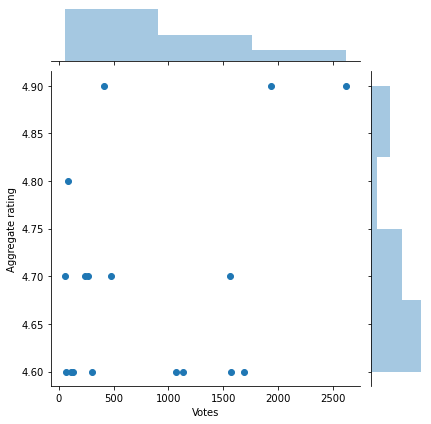

In [38]:
sns.jointplot('Votes','Aggregate rating',data=DelhiTopRes)

## 4)No of Restaurants in each country

In [40]:
India = IndianRes['Restaurant Name'].nunique()
India

6595

In [ ]:
India=indiaRes['Restaurant Name'].nunique()
India


## 5) Top 5 restaurants with online delivery

In [41]:
DelhiTopResOnline = IndianRes[(IndianRes['City']=='New Delhi')&(IndianRes['Aggregate rating']>4.5)&(IndianRes['Has Online delivery']=='Yes')][['Aggregate rating','Restaurant Name','Votes','Has Online delivery']].sort_values(ascending= False, by='Votes')

In [42]:
DelhiTopRes.style.apply(lambda x: ['background: green' if x.name =='Has online delivery' else 'background: lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes
2382,4.900000,Naturals Ice Cream,2620
2970,4.900000,Indian Accent - The Manor,1934
6028,4.600000,The California Boulevard,1691
4008,4.600000,Big Chill,1569
6366,4.700000,Echoes Satyaniketan,1563
7218,4.600000,Cafeteria & Co.,1136
2679,4.600000,Spezia Bistro,1071
6026,4.700000,Naturals Ice Cream,474
3667,4.900000,Masala Library,408
3101,4.600000,Tashan,304


## 6)	Cheap but best restaurants available in a city
**Lets check which country is providing most online delivery option** 

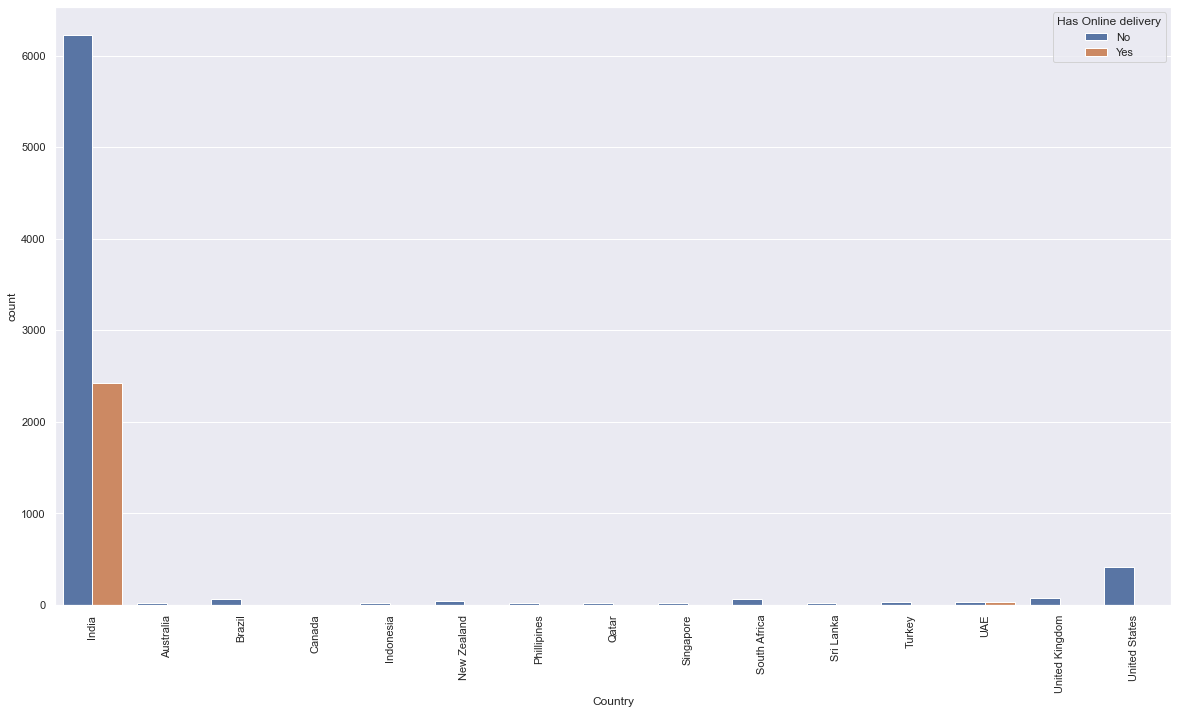

In [43]:
sns.set(rc ={'figure.figsize':(20,11)})
plt.xticks(rotation =90)
sns.countplot(restaurants['Country'], hue = restaurants['Has Online delivery'])

**Lets get down and hunt for the cheap but best restaurants available in a city**

In [45]:
Chennai = IndianRes[(IndianRes['City']=='Chennai')& (IndianRes['Aggregate rating']>4.5)&(IndianRes['Votes']>500)][['Average Cost for two','Restaurant Name','Aggregate rating','Votes']].sort_values(ascending=True, by=['Average Cost for two']).head()

In [46]:
Chennai.style.apply(lambda x: ['background: green' if x.name =='Has online delivery' else 'background: lightsteelblue' for i in x])

,Average Cost for two,Restaurant Name,Aggregate rating,Votes
183,350.000000,Fusilli Reasons,4.600000,1510
186,1200.000000,Bombay Brasserie,4.600000,1753
195,1400.000000,Coal Barbecues,4.600000,1267
194,1600.000000,AB's - Absolute Barbecues,4.900000,859
181,1700.000000,Chili's,4.800000,1262


## 7)Top cuisines in each region.

In [47]:
IndianCuisines=restaurants[restaurants['Country']=='India']['Cuisines'].value_counts().head()
IndianCuisines

North Indian             936
North Indian, Chinese    511
Fast Food                348
Chinese                  340
North Indian, Mughlai    334
Name: Cuisines, dtype: int64

## 8) Aggregate rating of all the restaurants in each city in a country

In [48]:
table = pd.pivot_table(data = restaurants, index =("Country","City"), values ="Aggregate rating")

In [49]:
cm = sns.light_palette("green", as_cmap=True)
table.style.background_gradient(cmap=cm, axis=0)

In [50]:
RestaurantratingEachCountry = pd.pivot_table(data = restaurants, index =('Country','Rating text'),values =('Restaurant ID'),aggfunc='count')

In [51]:
RestaurantGroup = restaurants.groupby(by ="Country")['Restaurant ID'].count()
RestaurantGroup.columns =['No of restaurants']

In [52]:
TotalRatingCountry = RestaurantGroup.groupby(by='Country').sum()
TotalRatingCountry.reset_index()

,Country,Restaurant ID
0,Australia,24
1,Brazil,60
2,Canada,4
3,India,8643
4,Indonesia,21
5,New Zealand,40
6,Phillipines,22
7,Qatar,20
8,Singapore,20
9,South Africa,60


In [54]:
FinalRestPerc =pd.merge(TotalRatingCountry.reset_index(), RestaurantratingEachCountry.reset_index(),on='Country')

In [55]:
FinalRestPerc['Percentage'] = (FinalRestPerc['Restaurant ID_y']/FinalRestPerc['Restaurant ID_x'])*100

In [56]:
FinalRestPerc

,Country,Restaurant ID_x,Rating text,Restaurant ID_y,Percentage
0,Australia,24,Average,4,16.666667
1,Australia,24,Excellent,1,4.166667
2,Australia,24,Good,13,54.166667
3,Australia,24,Poor,1,4.166667
4,Australia,24,Very Good,5,20.833333
...,...,...,...,...,...
61,United States,419,Excellent,67,15.990453
62,United States,419,Good,152,36.276850
63,United States,419,Not rated,3,0.715990
64,United States,419,Poor,2,0.477327


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

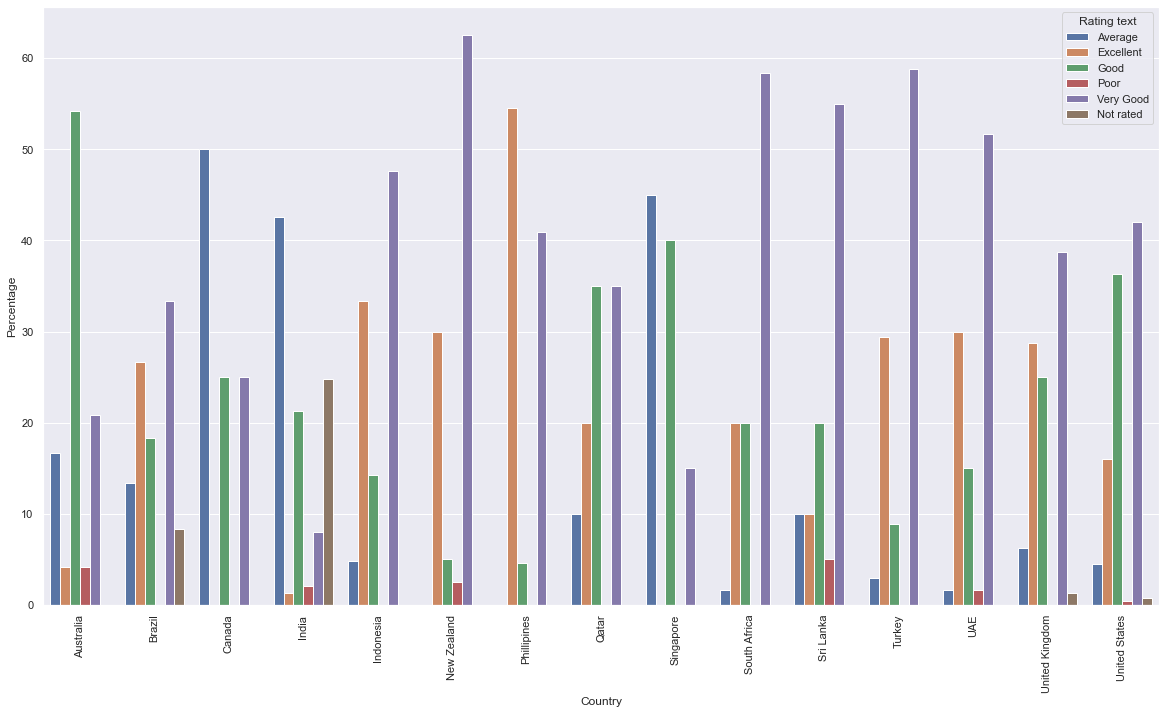

In [57]:
sns.set(rc ={'figure.figsize' :(20,11)})
sns.barplot("Country",'Percentage', data = FinalRestPerc, hue ='Rating text')
plt.xticks(rotation =90)

## 9) Does rating influences the cost of restaurant? (Draw boxplot for this).

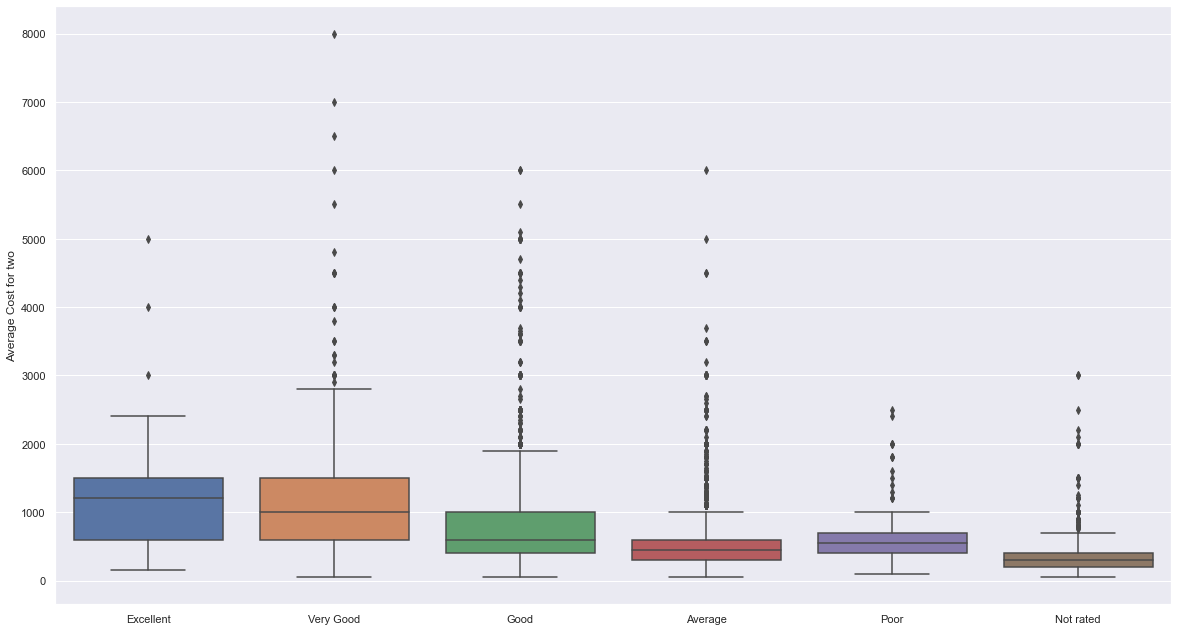

In [58]:
avgcostforindres = IndianRes['Average Cost for two']
aggratingofinres = pd.Categorical(values = IndianRes['Rating text'], categories =['Excellent','Very Good','Good','Average','Poor','Not rated'], ordered = True)
sns.boxplot(aggratingofinres,avgcostforindres)

## 10)Top Percentage cover of restaurants in a city.(Draw pie graph for this).

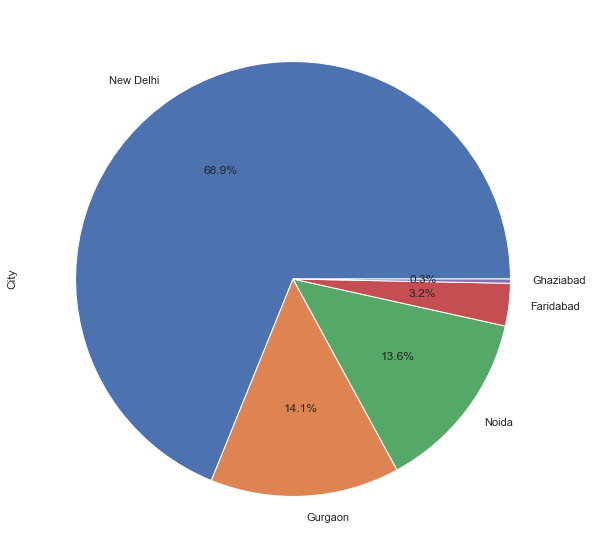

In [59]:
plt.figure(figsize=(10,10))
IndianRes['City'].value_counts().head().plot(kind ='pie',autopct ='%1.1f%%')

In [ ]:
plt.figure(figsize=(10,10))
indiaRes['City'].value_counts().head().plot(kind='pie',autopct='%1.1f%%')

In [60]:
booking_avail = IndianRes[(IndianRes['City']=='New Delhi')&(IndianRes['Aggregate rating']>4.5)&(IndianRes['Has Table booking']=='Yes')][['Aggregate rating','Restaurant Name','Votes','Has Table booking']].sort_values(ascending=False,by='Votes')
booking_avail.style.apply(lambda x: ['background: darkorange' if x.name == 'Has Table booking' else 'background: lightsteelblue' for i in x])

,Aggregate rating,Restaurant Name,Votes,Has Table booking
6028,4.600000,The California Boulevard,1691,Yes
2679,4.600000,Spezia Bistro,1071,Yes
3101,4.600000,Tashan,304,Yes
2383,4.700000,Zabardast Indian Kitchen,242,Yes
6024,4.600000,Band Baaja Baaraat,128,Yes


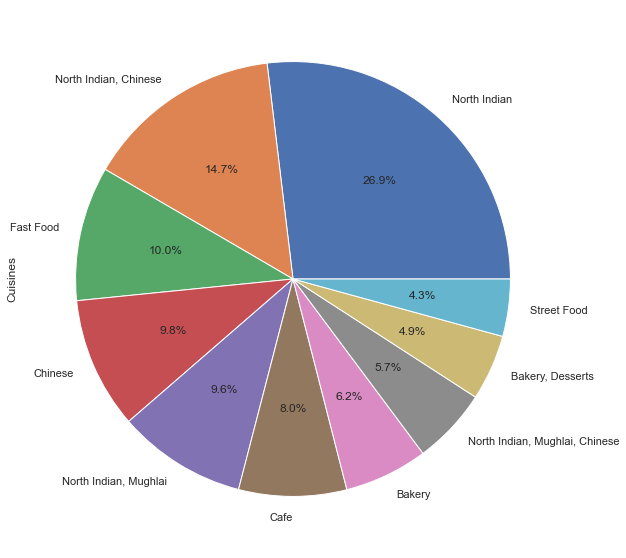

In [61]:
plt.figure(figsize=(10,10))
IndianRes['Cuisines'].value_counts().head(10).plot(kind ='pie',autopct ='%1.1f%%')